In my analysis, I aim to segment buyers by age to determine the target audience. And also see which products are most popular among buyers.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/juliatolchinskaya/Documents/pet_projects/Clothes/Womens_Clothing.csv',thousands=',')

In [3]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


Rename colums for better usablility

In [5]:
df = df.rename(columns={'Positive Feedback Count': 'positive_feedback_count', 'Division Name': 'division_name', 'Department Name':'department_name', 'Class Name': 'class_name', 'Clothing ID': 'clothing_id'})


In [6]:
df.head()

,Unnamed: 0,clothing_id,Age,Title,Review Text,Rating,Recommended IND,positive_feedback_count,division_name,department_name,class_name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


The best-selling clothing classes with a high rating

In [7]:
Count_of_sale_class = df.groupby( ['class_name'], as_index=False).agg({'clothing_id': 'count'})
Count_of_sale_class = Count_of_sale_class.rename(columns={'clothing_id': 'Count_of_sale'})
Count_of_sale_class.sort_values('Count_of_sale', ascending = False)

,class_name,Count_of_sale
3,Dresses,6319
8,Knits,4843
0,Blouses,3097
17,Sweaters,1428
13,Pants,1388
7,Jeans,1147
4,Fine gauge,1100
15,Skirts,945
6,Jackets,704
11,Lounge,691


Now we can understand which categories of clothing customers prefer to buy

<AxesSubplot:xlabel='class_name'>

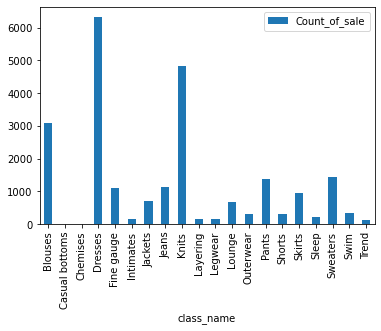

In [8]:
Count_of_sale_class.plot(kind="bar", x = 'class_name', y = 'Count_of_sale')

Age of buyers who have made purchases

In [9]:
Count_of_sale_age = df.groupby( ['Age'], as_index=False).agg({'clothing_id': 'count'})
Count_of_sale_age = Count_of_sale_age.rename(columns={'clothing_id': 'Count_of_sale'})


<AxesSubplot:xlabel='Age'>

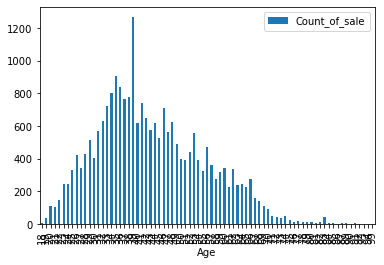

In [10]:
Count_of_sale_age.plot(kind="bar", x = 'Age', y = 'Count_of_sale')

In [11]:
Ages_of_big_sale = Count_of_sale_age.sort_values('Count_of_sale', ascending = False).head(20)
Ages_of_big_sale.sort_values('Age', ascending = False)

,Age,Count_of_sale
35,53,560
30,48,626
29,47,564
28,46,713
27,45,529
26,44,617
25,43,579
24,42,651
23,41,741
22,40,617


It can be concluded that the target audience of this company is people 29-53 years old